In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.float_format",lambda x: "{:.2f}".format(x))
np.set_printoptions(suppress=True)

In [7]:
df_customers = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")
df_bureau = pd.read_csv("bureau_data.csv")

In [8]:
df_customers.shape,df_loans.shape,df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [9]:
df = pd.merge(df_customers,df_loans,on = "cust_id")
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [10]:
df = pd.merge(df,df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [12]:
df["default"] = df["default"].astype(int)
df["default"].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [13]:
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4


In [14]:
X = df.drop("default",axis = "columns")
y = df["default"]

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train,y_train],axis = "columns")
df_test = pd.concat([X_test,y_test],axis = "columns")

In [15]:
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [16]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

In [17]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [18]:
df_train["residence_type"].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [19]:
mode_residence = df_train["residence_type"].mode()[0]
mode_residence

'Owned'

In [20]:
df_train["residence_type"].fillna(mode_residence,inplace=True)

In [21]:
df_train.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [22]:
df_test["residence_type"].fillna(mode_residence,inplace=True)

In [23]:
df_train.duplicated().sum()

0

In [24]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 12746 to 37784
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      37500 non-null  object 
 1   age                          37500 non-null  int64  
 2   gender                       37500 non-null  object 
 3   marital_status               37500 non-null  object 
 4   employment_status            37500 non-null  object 
 5   income                       37500 non-null  int64  
 6   number_of_dependants         37500 non-null  int64  
 7   residence_type               37500 non-null  object 
 8   years_at_current_address     37500 non-null  int64  
 9   city                         37500 non-null  object 
 10  state                        37500 non-null  object 
 11  zipcode                      37500 non-null  int64  
 12  loan_id                      37500 non-null  object 
 13  loan_purpose     

In [26]:
# Continuous numerical columns (int/float type but representing measurable values)
columns_continuous = [
    "age", 
    "income", 
    "number_of_dependants",
    "years_at_current_address", 
    "sanction_amount",
    "loan_amount", 
    "processing_fee", 
    "gst", 
    "net_disbursement",
    "loan_tenure_months", 
    "principal_outstanding", 
    "bank_balance_at_application",
    "number_of_open_accounts", 
    "number_of_closed_accounts", 
    "total_loan_months",
    "delinquent_months", 
    "total_dpd", 
    "enquiry_count",
    "credit_utilization_ratio"
]

# Categorical columns (string/object type or discrete categories)
columns_categorical = [
    "cust_id", 
    "gender", 
    "marital_status", 
    "employment_status", 
    "residence_type",
    "city", 
    "state",
    "zipcode", 
    "loan_id", 
    "loan_purpose", 
    "loan_type",
    "disbursal_date", 
    "installment_start_dt",
    "default"
]


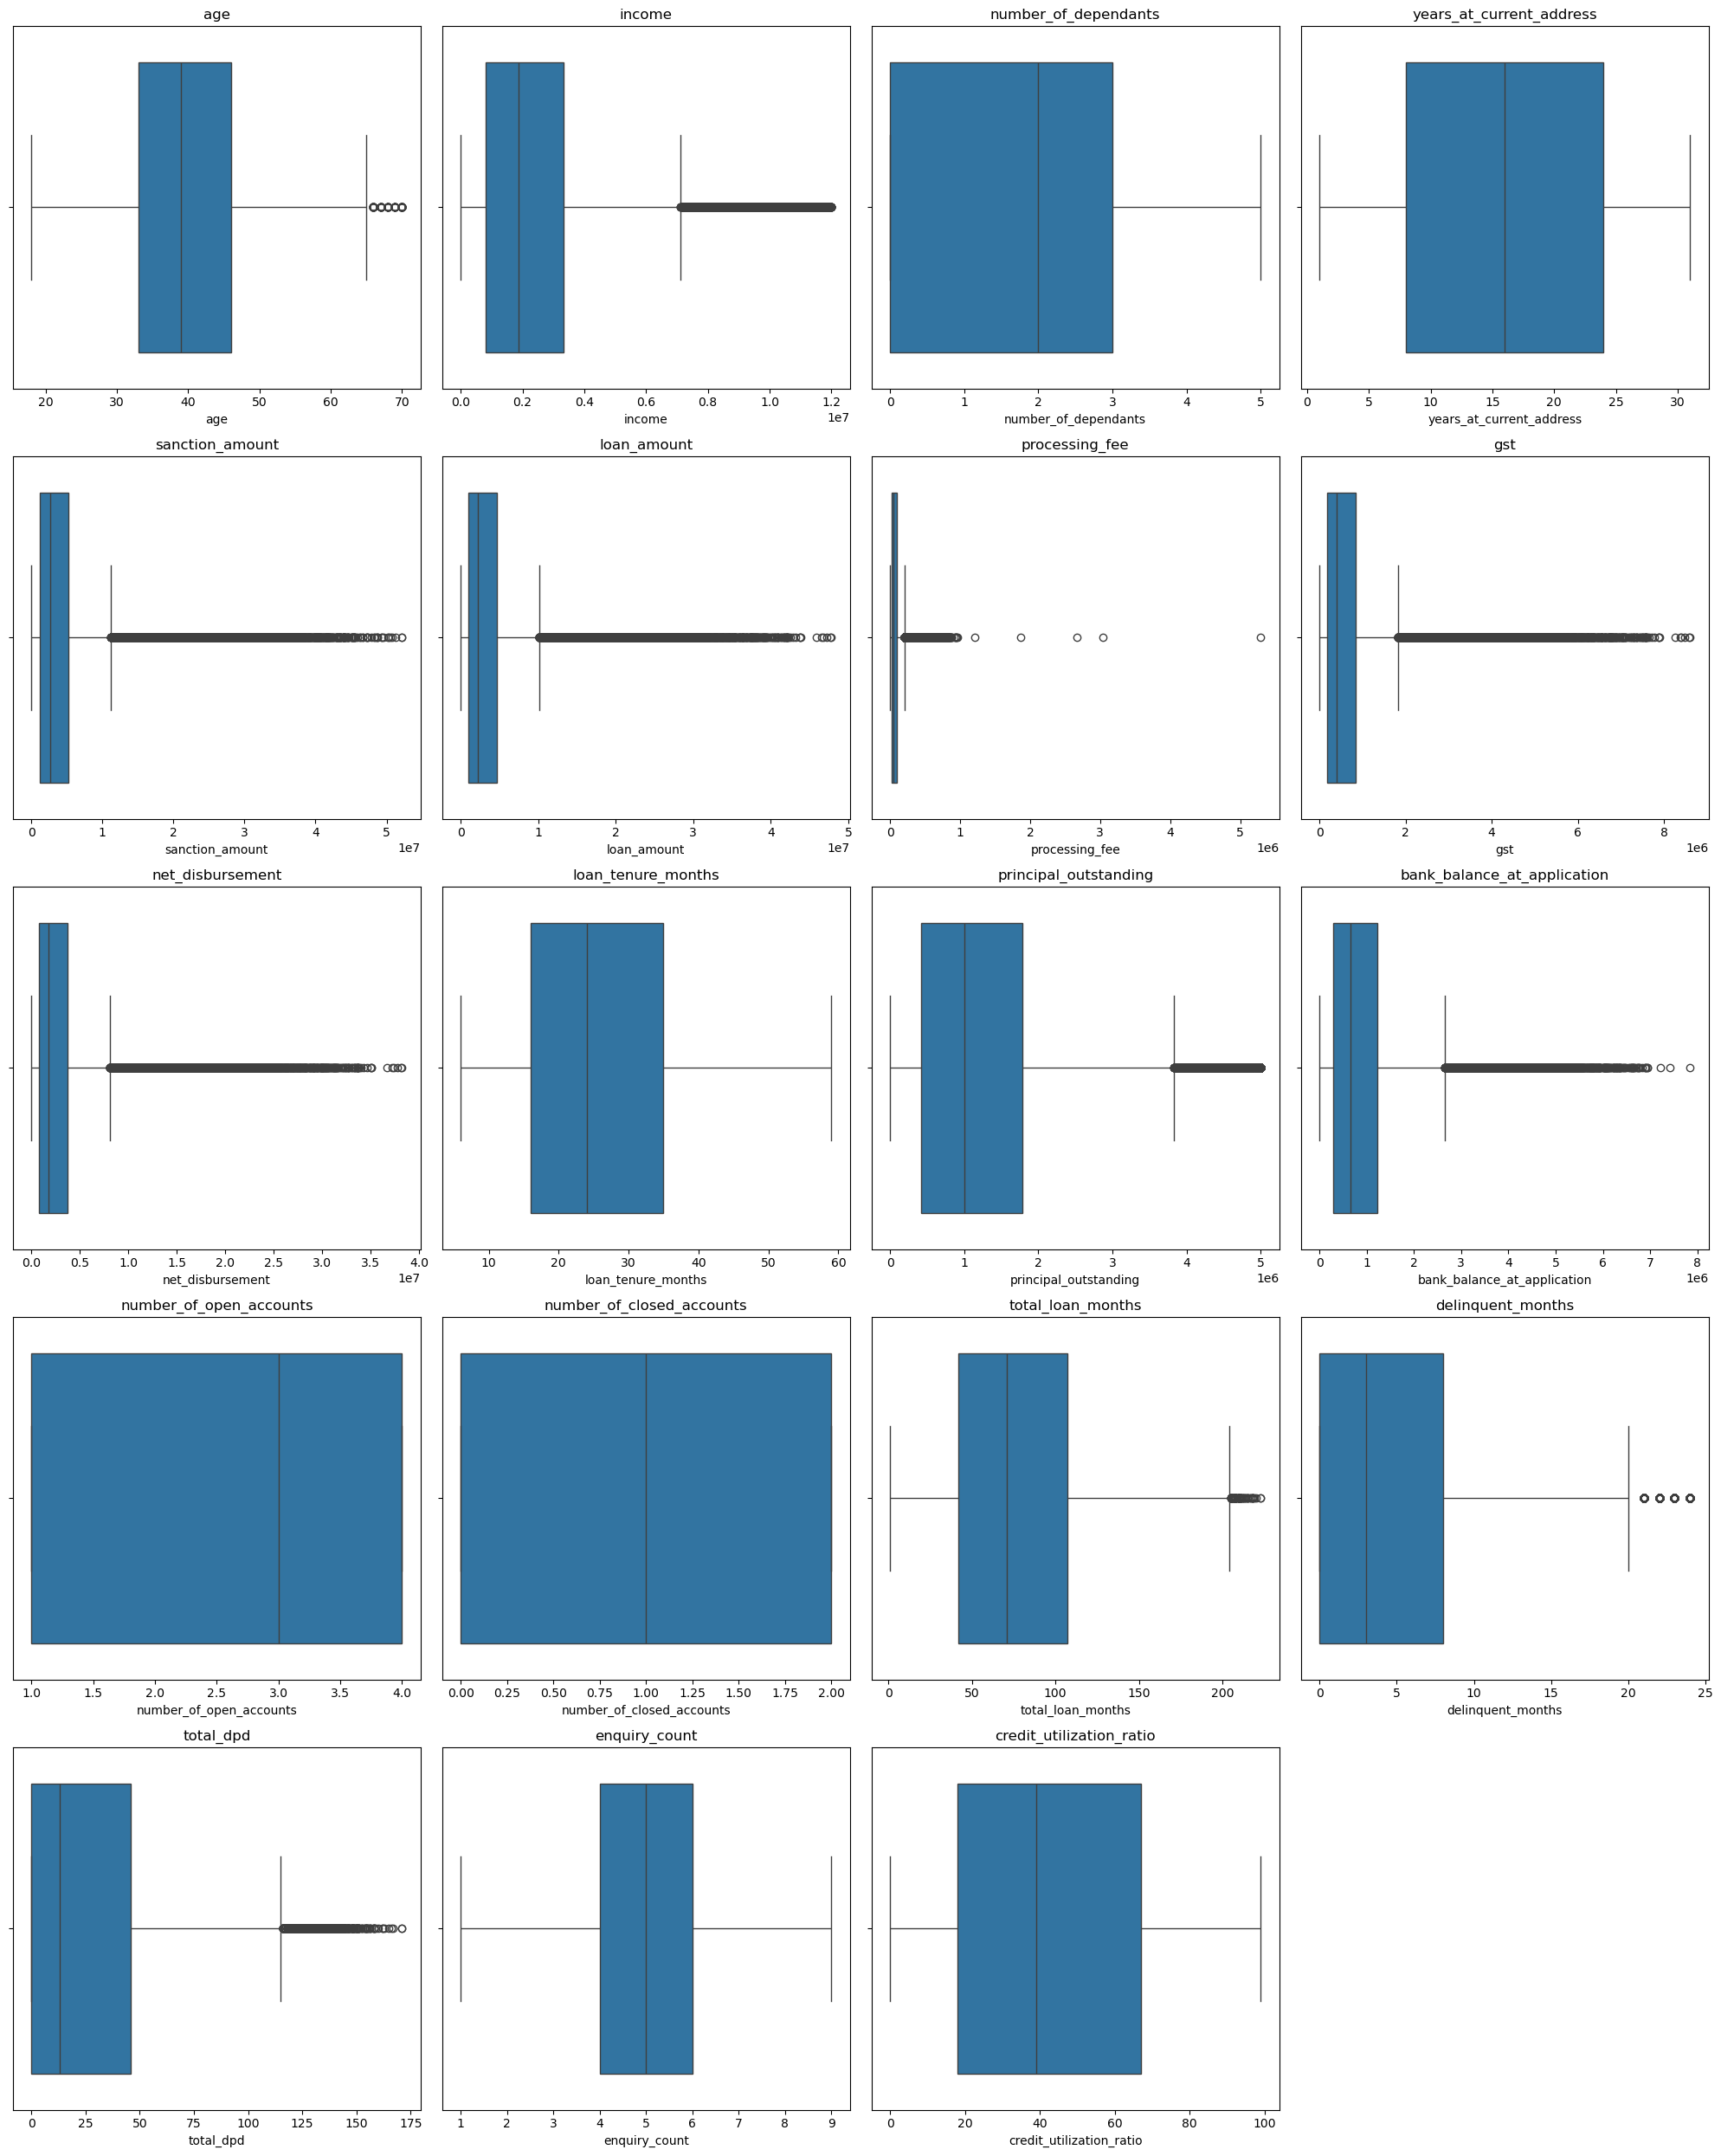

In [27]:
# Set number of plots per row
cols_per_row = 4
total_cols = len(columns_continuous)
rows = -(-total_cols // cols_per_row)  # Ceiling division

plt.figure(figsize=(20, 5 * rows))  # Adjust height for rows

for i, col in enumerate(columns_continuous, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(x=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

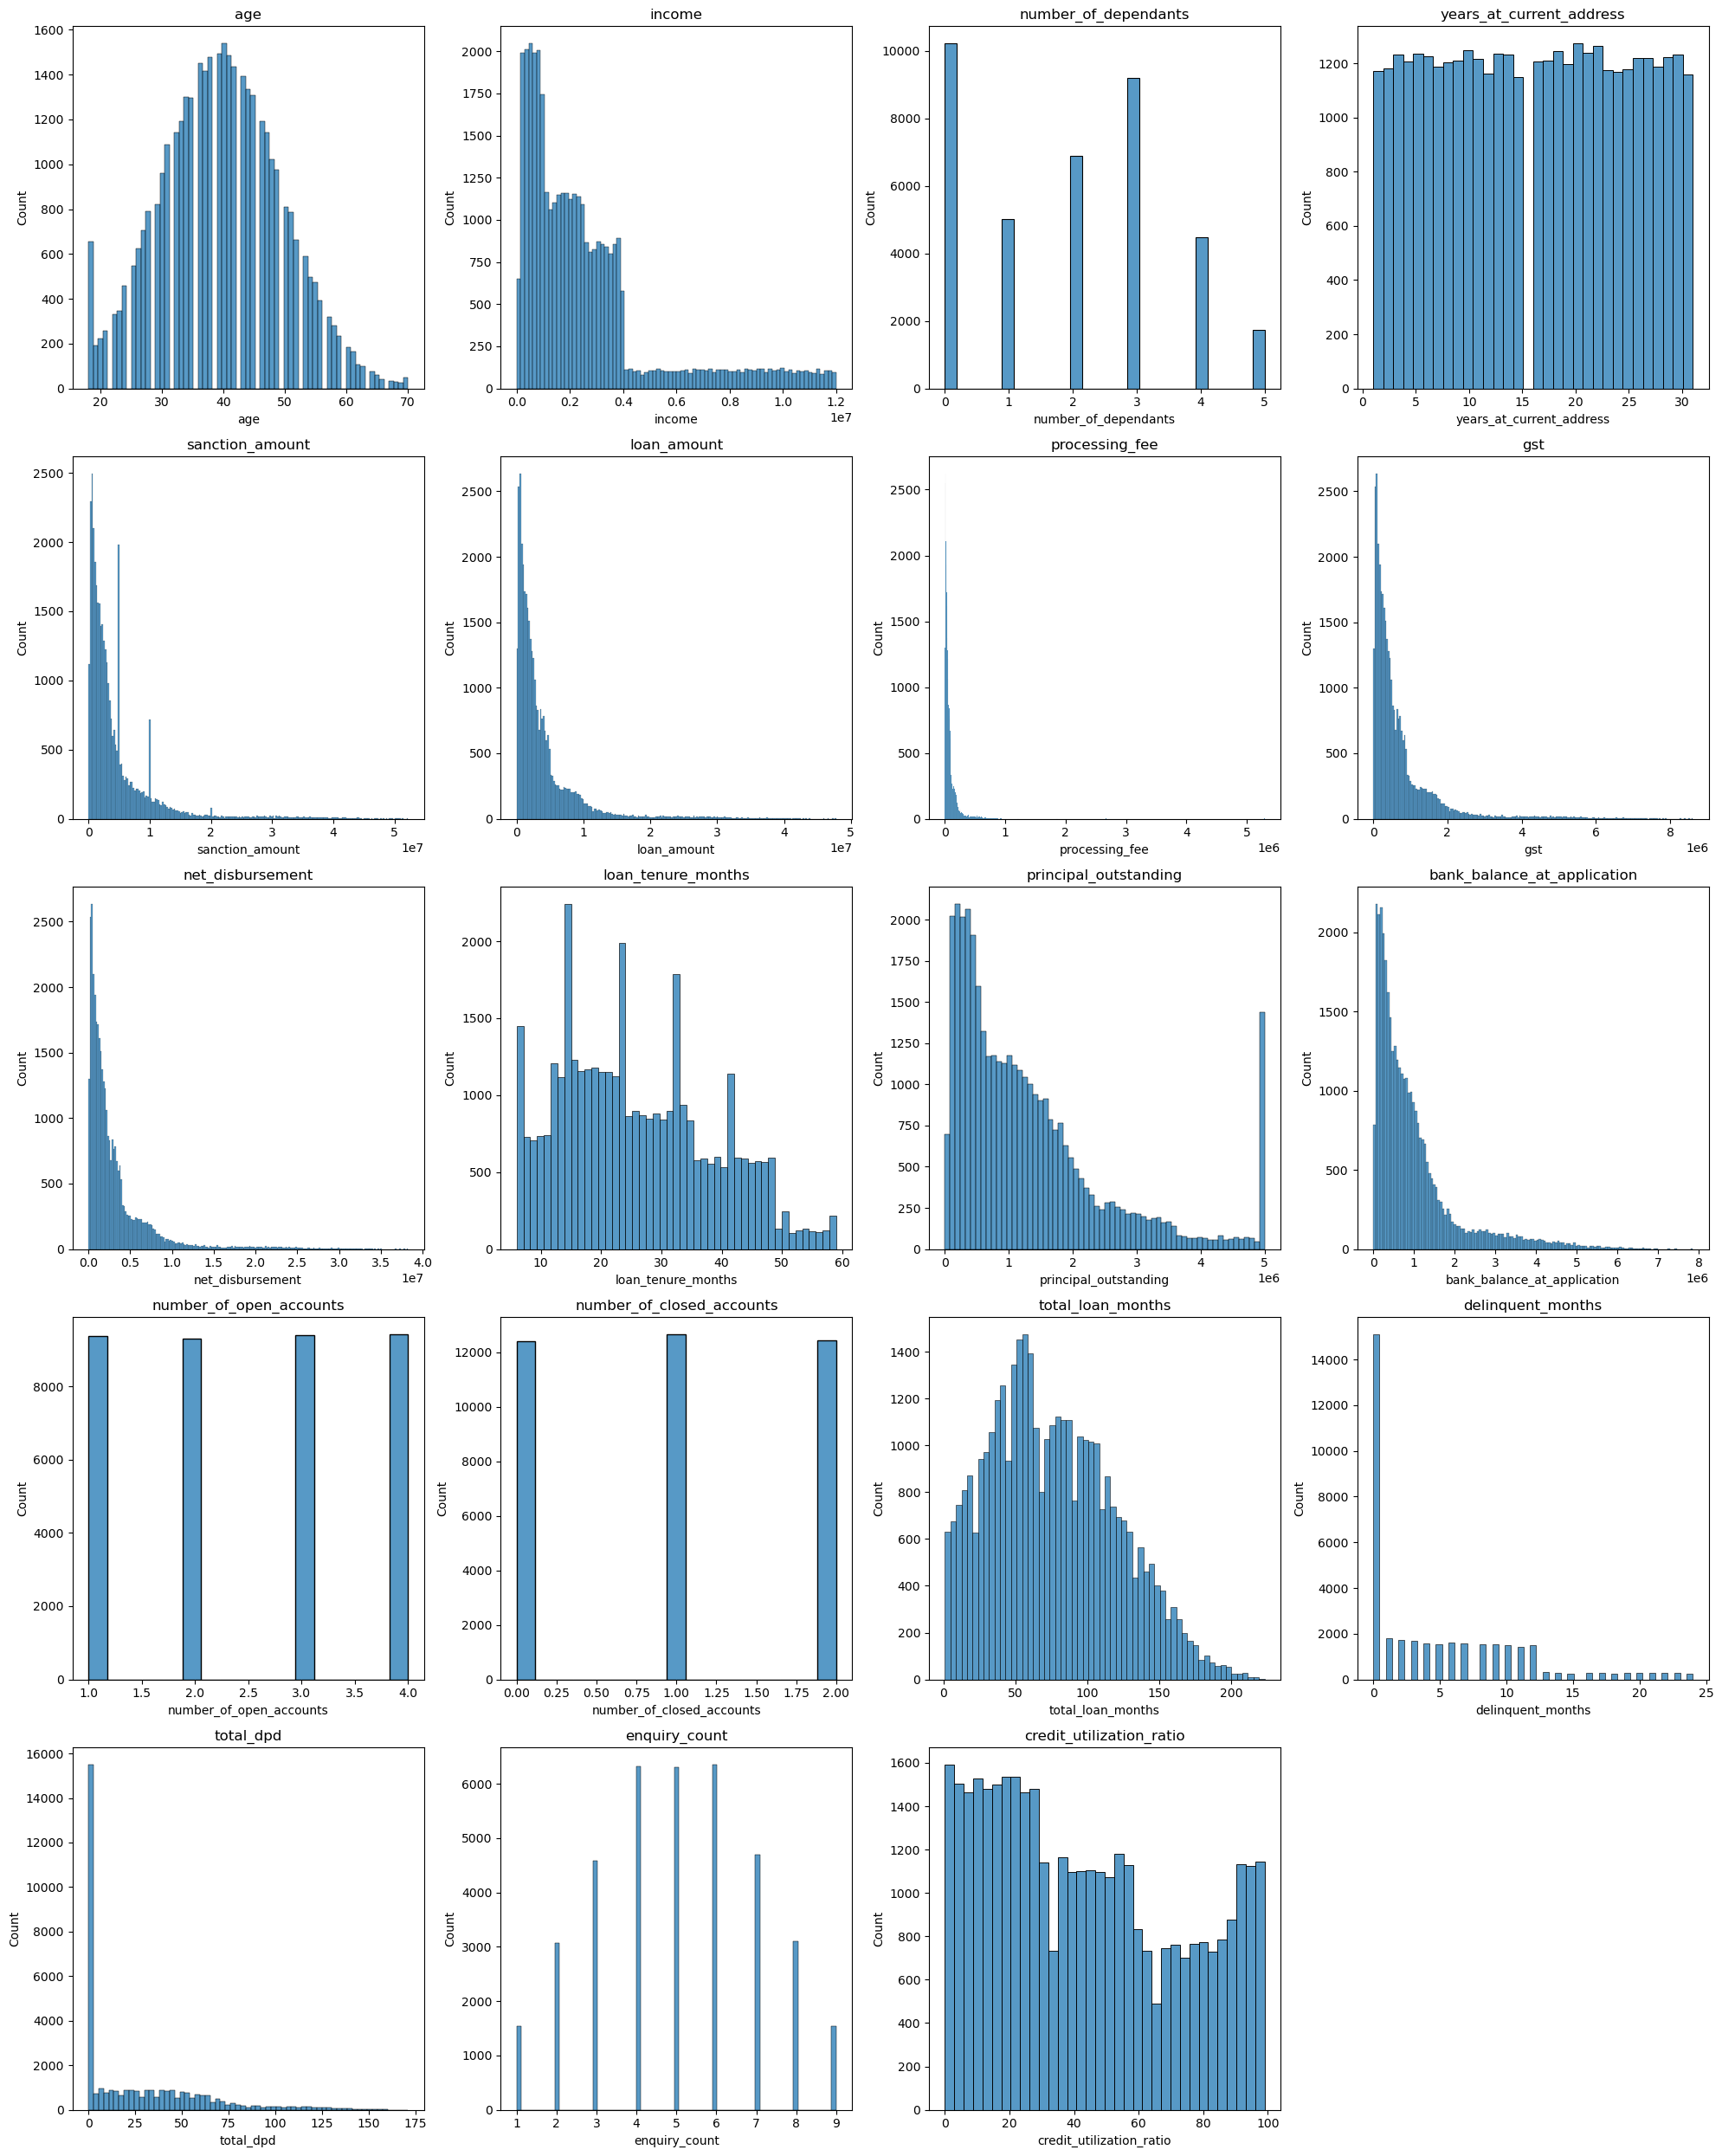

In [28]:
# Set number of plots per row
cols_per_row = 4
total_cols = len(columns_continuous)
rows = -(-total_cols // cols_per_row)  # Ceiling division

plt.figure(figsize=(20, 5 * rows))  # Adjust height for rows

for i, col in enumerate(columns_continuous, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(x=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [29]:
df_train["processing_fee"].describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [30]:
df_train[(df_train["processing_fee"]/df_train["loan_amount"]) > 0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [31]:
df_train_1 = df_train[(df_train["processing_fee"]/df_train["loan_amount"]) < 0.03].copy()
df_train_1[(df_train_1["processing_fee"]/df_train_1["loan_amount"]) > 0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee


In [32]:
df_test = df_test[(df_test["processing_fee"]/df_test["loan_amount"]) < 0.03].copy()
df_test.shape

(12497, 33)

In [33]:
columns_categorical

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt',
 'default']

In [34]:
for col in columns_categorical:
    print(col , "-->", df_train_1[col].unique() )

cust_id --> ['C12747' 'C32496' 'C43676' ... 'C45237' 'C49229' 'C37785']
gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_id --> ['L12747' 'L32496' 'L43676' ... 'L45237' 'L49229' 'L37785']
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
disbursal_date --> ['2020-10-31' '2022-10-22' '2023-12-04' ... '2022-02-07' '2019-10-30'
 '2022-10-04']
installment_start_dt --> ['2020-11-11' '2022-10-27' '2023-12-29' ... '2024-08-19' '2019-07-28'
 '2019-07-25']
default --> [0 1]


In [35]:
df_train_1["loan_purpose"] = df_train_1["loan_purpose"].replace("Personaal","Personal")
df_test["loan_purpose"] = df_test["loan_purpose"].replace("Personaal","Personal")

In [36]:
df_train_1["loan_purpose"].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

<!-- EDA Header -->
<div style="
    background: linear-gradient(90deg, #ff6b6b, #ffb020);
    padding: 16px 20px;
    border-radius: 14px;
    color: white;
    font-size: 28px;
    font-weight: 800;
    text-align: center;
    letter-spacing: 1px;
    box-shadow: 0 6px 16px rgba(0,0,0,.25);
    margin-top: 20px;
">
  📊 Exploratory Data Analysis (EDA)
</div>is
</h1>


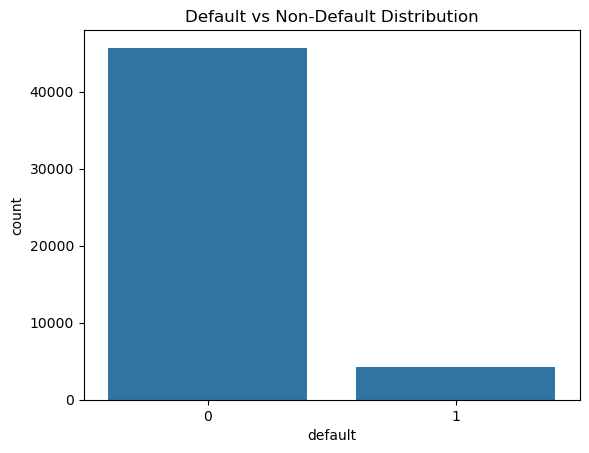

In [38]:
df_train['default'].value_counts(normalize=True) * 100


sns.countplot(x='default', data=df)
plt.title("Default vs Non-Default Distribution")
plt.show()

# Age vs Default

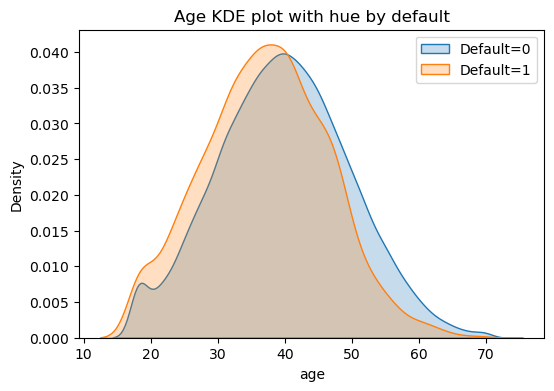

In [40]:
plt.figure(figsize=(6,4))
sns.kdeplot(df_train[df_train.default==0]["age"],fill=True,label ="Default=0")
sns.kdeplot(df_train[df_train.default==1]["age"],fill=True,label ="Default=1")
plt.title("Age KDE plot with hue by default")
plt.legend()
plt.show()


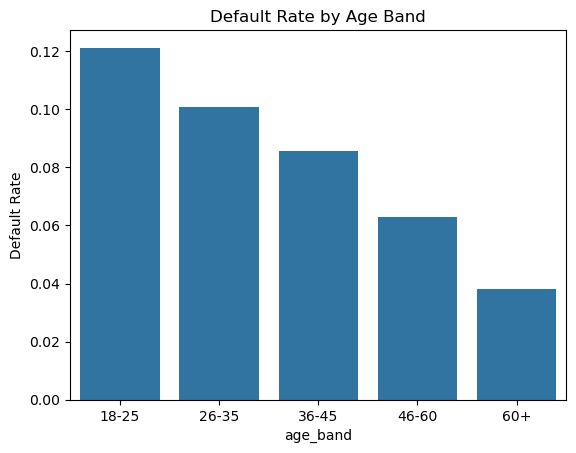

In [41]:
df['age_band'] = pd.cut(df['age'],
                        bins=[18, 25, 35, 45, 60, 100],
                        labels=['18-25', '26-35', '36-45', '46-60', '60+'])

age_default = df.groupby('age_band')['default'].mean().reset_index()

sns.barplot(x='age_band', y='default', data=age_default)
plt.ylabel("Default Rate")
plt.title("Default Rate by Age Band")
plt.show()


# Categorical Features vs Default

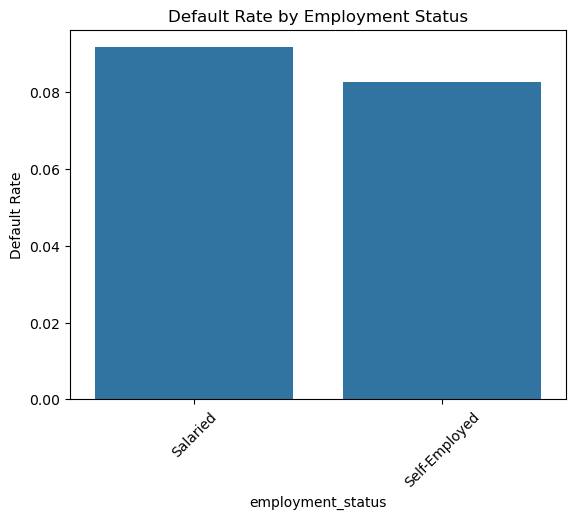

In [43]:
emp_default = df.groupby('employment_status')['default'].mean().reset_index()
sns.barplot(x='employment_status', y='default', data=emp_default, order=emp_default.sort_values('default', ascending=False)['employment_status'])
plt.xticks(rotation=45)
plt.ylabel("Default Rate")
plt.title("Default Rate by Employment Status")
plt.show()


<!DOCTYPE html>
<html>
<head>
<style>
    body {
        font-family: Arial, sans-serif;
        margin: 20px;
        line-height: 1.6;
        background-color: #f8f9fa;
    }
    h1 {
        color: #2c3e50;
        border-bottom: 2px solid #2980b9;
        padding-bottom: 5px;
    }
    h2 {
        color: #34495e;
        margin-top: 30px;
    }
    .insight {
        background: #ffffff;
        border-left: 5px solid #2980b9;
        padding: 15px;
        margin-bottom: 20px;
        box-shadow: 0px 2px 5px rgba(0,0,0,0.1);
    }
    .highlight {
        font-weight: bold;
        color: #e74c3c;
    }
    ul {
        margin-top: 10px;
    }/head>
<body>

<h1>📊 Credit Risk EDA Insights</h1>

<div class="insight">
    <h2>1. Target Variable Imbalance</h2>
    <p>The dataset is <span class="highlight">highly imbalanced</span>:</p>
    <ul>
        <li>Majority (~90%+) are <b>Non-Defaults (0)</b></li>
        <li>Minority (~< 10%) are <b>Defaults (1)</b></li>
    </ul>
    <p>⚠ This imbalance could lead to biased models predicting mostly <b>0</b>. Class balancing methods like <i>SMOTE</i> or <i>class weights</i> will be important.</p>
</div>

<div class="insight">
    <h2>2. Age Band Analysis</h2>
    <p>Default rate by age group shows a clear trend:</p>
    <ul>
        <li><b>18-25 years</b> → Highest default rate (~12%)</li>
        <li>Default rates steadily decline with age</li>
        <li><b>60+ years</b> → Lowest default rate (~4%)</li>
    </ul>
    <p>📌 Younger borrowers tend to have higher credit risk — possibly due to limited credit history or unstable income.</p>
</div>

<div class="insight">
    <h2>3. Employment Status Impact</h2>
    <ul>
        <li><b>Salaried</b> borrowers → Slightly higher default rate (~9%)</li>
        <li><b>Self-Employed</b> borrowers → Slightly lower (~8.3%)</li>
    </ul>
    <p>📌 The difference is small, suggesting employment type may not be a strong predictor alone.</p>
</div>

<div class="insight">
    <h2>4. Age Distribution (KDE)</h2>
    <p>The KDE plot shows:</p>
    <ul>
        <li>Defaults are more concentrated in the <b>20-40 age range</b></li>
        <li>Non-defaults are more evenly spread, especially after age 40</li>
    </ul>
    <p>📌 This supports the Age Band analysis — younger individuals are more default-prone.</p>
</div>

</body>
</html>


<!DOCTYPE html>
<html>
<head>
<style>
    body {
        font-family: Arial, sans-serif;
        margin: 20px;
        line-height: 1.6;
        background-color: #f8f9fa;
    }
    h1 {
        color: #2c3e50;
        border-bottom: 2px solid #2980b9;
        padding-bottom: 5px;
    }
    h2 {
        color: #34495e;
        margin-top: 30px;
    }
    .insight {
        background: #ffffff;
        border-left: 5px solid #2980b9;
        padding: 15px;
        margin-bottom: 20px;
        box-shadow: 0px 2px 5px rgba(0,0,0,0.1);
    }
    .highlight {
        font-weight: bold;
        color: #e74c3c;
    }
    ul {
        margin-top: 10px;
    }
</style>
</head>
<body>

<h1>📊 EDA Insights</h1>

<div class="insight">
    <h2>1. Target Variable Imbalance</h2>
    <p>The dataset is <span class="highlight">highly imbalanced</span>:</p>
    <ul>
        <li>Majority (~90%+) are <b>Non-Defaults (0)</b></li>
        <li>Minority (~< 10%) are <b>Defaults (1)</b></li>
    </ul>
    <p>⚠ This imbalance could lead to biased models predicting mostly <b>0</b>. Class balancing methods like <i>SMOTE</i> or <i>class weights</i> will be important.</p>
</div>

<div class="insight">
    <h2>2. Age Band Analysis</h2>
    <p>Default rate by age group shows a clear trend:</p>
    <ul>
        <li><b>18-25 years</b> → Highest default rate (~12%)</li>
        <li>Default rates steadily decline with age</li>
        <li><b>60+ years</b> → Lowest default rate (~4%)</li>
    </ul>
    <p>📌 Younger borrowers tend to have higher credit risk — possibly due to limited credit history or unstable income.</p>
</div>

<div class="insight">
    <h2>3. Employment Status Impact</h2>
    <ul>
        <li><b>Salaried</b> borrowers → Slightly higher default rate (~9%)</li>
        <li><b>Self-Employed</b> borrowers → Slightly lower (~8.3%)</li>
    </ul>
    <p>📌 The difference is small, suggesting employment type may not be a strong predictor alone.</p>
</div>

<div class="insight">
    <h2>4. Age Distribution (KDE)</h2>
    <p>The KDE plot shows:</p>
    <ul>
        <li>Defaults are more concentrated in the <b>20-40 age range</b></li>
        <li>Non-defaults are more evenly spread, especially after age 40</li>
    </ul>
    <p>📌 This supports the Age Band analysis — younger individuals are more default-prone.</p>
</div>

</body>
</html>


<!-- Feature Engineering Header -->
<div style="
    background: linear-gradient(90deg, #7c9cff, #00d6b9);
    padding: 16px 20px;
    border-radius: 14px;
    color: white;
    font-size: 28px;
    font-weight: 800;
    text-align: center;
    letter-spacing: 1px;
    box-shadow: 0 6px 16px rgba(0,0,0,.25);
">
  🚀 Feature Engineering
</div>

#### Generating Loan to Income (LTI) Ratio

In [48]:
df_train_1[["loan_amount", "income"]].head(3)

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000


In [49]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount'] / df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

In [50]:
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

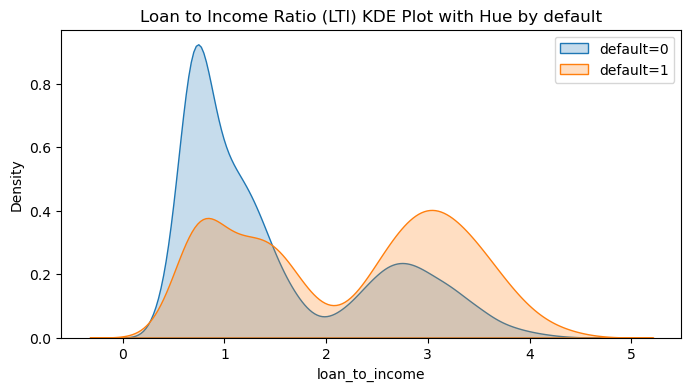

In [51]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1.The blue distribution shows that most values are concentrated in the lower range of LTI.

2.The orange distribution indicates that higher LTI values are associated with a greater likelihood of risky loans.

#### Generating Delinquency Ratio

In [54]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)

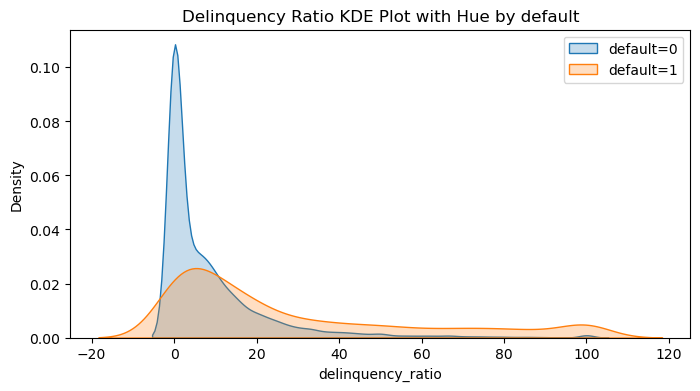

In [55]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1.The blue distribution indicates that most of its values are concentrated at the lower end of the LTI scale.

2.The orange distribution shows a larger number of values at higher delinquency ratios, suggesting a possible correlation with loan defaults.

#### Generating Avg DPD Per Delinquency

In [58]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

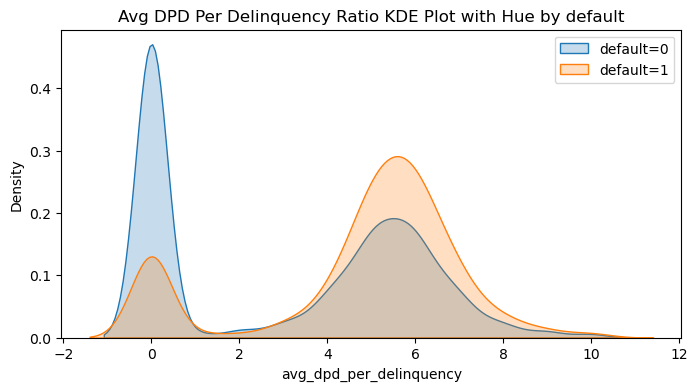

In [59]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**
  
Defaults are seen more often at higher values of avg_dpd_per_delinquency, showing it’s an important predictor.

### Removing columns that are just unique ids and don't have influence on target

In [62]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [63]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'],axis="columns")

### Removing columns that business person asked to remove

In [65]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [66]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

### VIF to measure multicolinearity

In [68]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns



scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [69]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [71]:
X_train.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,0.66,...,0.42,1.00,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,0.49,...,0.83,0.09,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62


In [72]:
calculate_vif(X_train[cols_to_scale])

,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [73]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [74]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [75]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

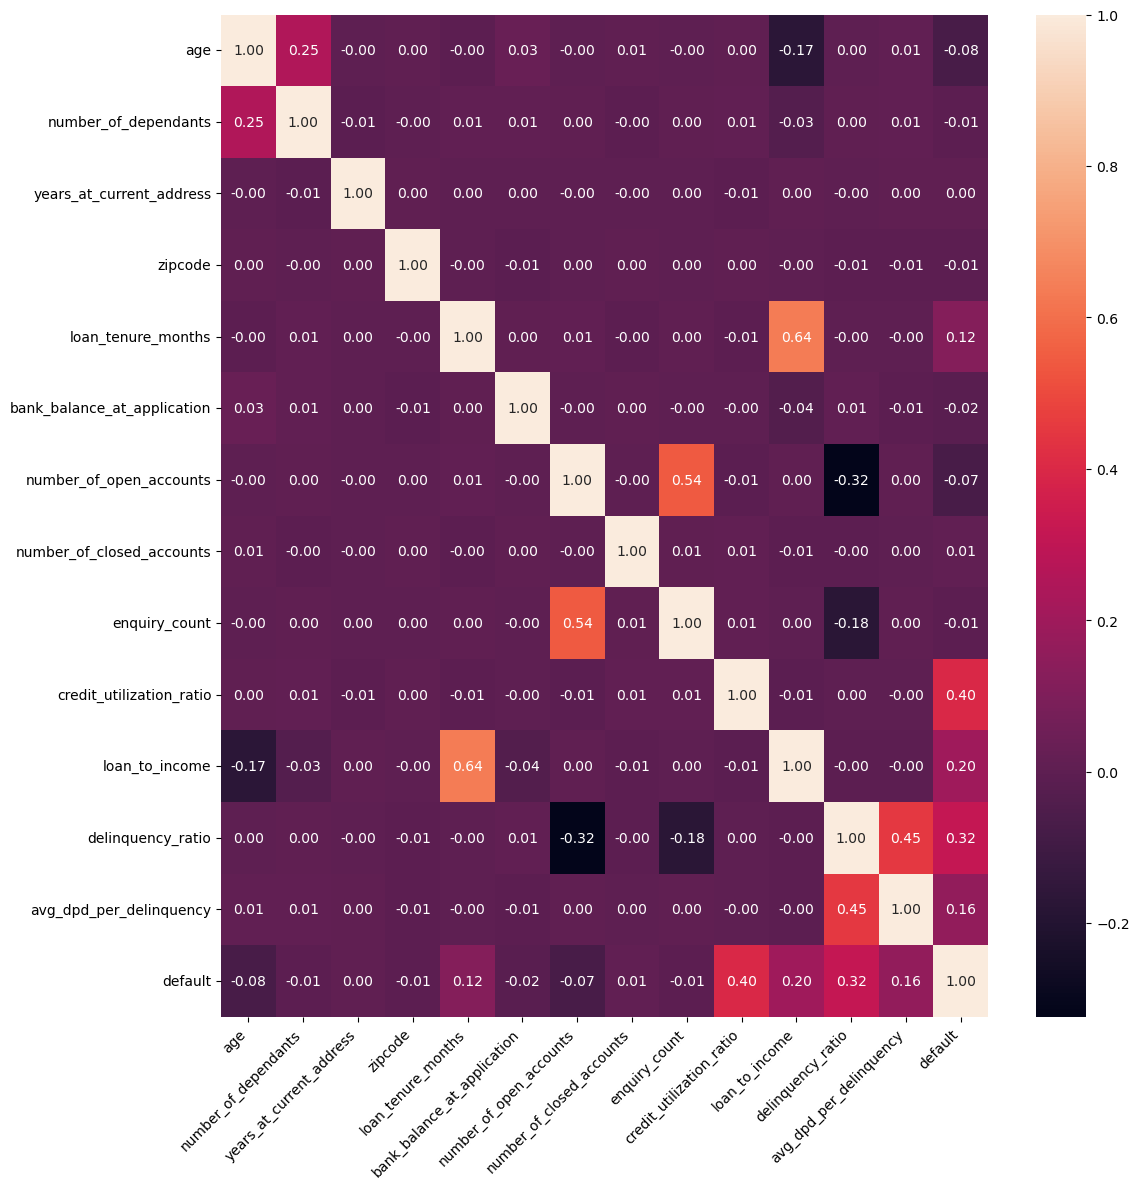

In [76]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [77]:
columns_categorical

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt',
 'default']

### Feature Selection: Categorical Features

#### Calculating WOE,IV

In [80]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'bad'})
    grouped['good']=grouped['total']-grouped['bad']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,bad,good,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.21,0.10,0.72,0.08
Education,5620,559,5061,0.15,0.17,-0.16,0.00
Home,11304,1734,9570,0.28,0.54,-0.66,0.17
Personal,13117,603,12514,0.37,0.19,0.67,0.12


In [81]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914914,
 'marital_status': 0.001129766845390139,
 'employment_status': 0.003953046301722579,
 'number_of_dependants': 0.0019380899135053517,
 'residence_type': 0.24674526871814498,
 'years_at_current_address': 0.002080051360815637,
 'city': 0.0019059578709781514,
 'state': 0.0019005589806779276,
 'zipcode': 0.0016677413243392568,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.1631932490414922,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.006318799327751639,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421576,
 'enquiry_count': 0.00786421408534261,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.476415456948364,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_delinquency': 0.4015190541219018}

In [82]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [83]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [85]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [86]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False
9040,0.462,0.642,0.667,0.879,0.194,0.000,0.000,False,False,True,False,False,False
13077,0.769,0.170,0.000,0.717,0.047,0.000,0.000,True,False,False,False,True,True


In [87]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(5)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.828,0.180,0.000,0.000,True,False,False,False,False,False
35347,0.365,0.755,1.000,0.485,0.571,0.024,0.700,True,False,False,True,False,False
41814,0.577,0.717,0.667,0.980,0.407,0.107,0.640,False,False,False,True,False,False


In [88]:
X_train_encoded.shape

(37488, 13)

In [89]:
X_test_encoded.shape

(12497, 13)

<div style="
    background: linear-gradient(90deg, #2ecc71, #27ae60);
    padding: 16px 20px;
    border-radius: 14px;
    color: white;
    font-size: 28px;
    font-weight: 800;
    text-align: center;
    letter-spacing: 1px;
    box-shadow: 0 6px 16px rgba(0,0,0,.25);
">
  🤖 Model Training
</div>


### Trial 1

1.Models implemented: Logistic Regression, Random Forest, and XGBoost.

2.Imbalance in classes was ignored during this trial.

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [93]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.72      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.92      0.86      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [94]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Logistic Regression

In [96]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': 1438.44988828766}
Best Score: 0.7578820896729832
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for XGBoost

In [98]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 10.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
Best Score: 0.7871111337608833
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.78      0.82      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.96     12497



### Trial 2

Models trained: Logistic Regression & XGB.

Class imbalance was mitigated through under-sampling of majority class.

In [100]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [101]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [102]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11423
           1       0.52      0.99      0.68      1074

    accuracy                           0.92     12497
   macro avg       0.76      0.95      0.82     12497
weighted avg       0.96      0.92      0.93     12497



### trial 3

1.Used Logistic Regression model.

2.Dealt with class imbalance using SMOTE-Tomek technique.

3.Conducted hyperparameter tuning with Optuna

In [104]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34195
1    34195
Name: count, dtype: int64

In [105]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [106]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [107]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-08-19 21:09:48,739] A new study created in memory with name: no-name-a3b588b6-52ed-4705-9566-7caf21f0f4aa
[I 2025-08-19 21:09:48,976] Trial 0 finished with value: 0.8382113300301072 and parameters: {'C': 0.00016666558999873967, 'solver': 'lbfgs', 'tol': 3.799468778912426e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8382113300301072.
[I 2025-08-19 21:09:49,326] Trial 1 finished with value: 0.9454888555810707 and parameters: {'C': 28.73119630162576, 'solver': 'saga', 'tol': 0.0025160779239326828, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9454888555810707.
[I 2025-08-19 21:09:49,562] Trial 2 finished with value: 0.809440606675835 and parameters: {'C': 0.0002002322444281234, 'solver': 'liblinear', 'tol': 2.325325686340489e-05, 'class_weight': None}. Best is trial 1 with value: 0.9454888555810707.
[I 2025-08-19 21:09:49,898] Trial 3 finished with value: 0.943972200025188 and parameters: {'C': 0.2801493771261829, 'solver': 'newton-cg', 'tol': 3.860

In [108]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9458678294362425
  Params: 
    C: 4.603360851349893
    solver: liblinear
    tol: 0.00018284884202477003
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Attempt 4

Trained XGBoost model.

Handled imbalance with SMOTE-Tomek technique.

Applied Optuna for hyperparameter tuning.

In [110]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-08-19 21:10:13,319] A new study created in memory with name: no-name-97313041-a1cb-4980-8c2d-39473b72d02e
[I 2025-08-19 21:10:14,859] Trial 0 finished with value: 0.9662668759047709 and parameters: {'lambda': 0.040661036303861336, 'alpha': 0.0014215859165940883, 'subsample': 0.8119228038634898, 'colsample_bytree': 0.6077202449439165, 'max_depth': 9, 'eta': 0.2178539442141687, 'gamma': 7.205640862797607, 'scale_pos_weight': 4.773164835578339, 'min_child_weight': 8, 'max_delta_step': 4}. Best is trial 0 with value: 0.9662668759047709.
[I 2025-08-19 21:10:16,574] Trial 1 finished with value: 0.9633405211773316 and parameters: {'lambda': 0.03733563416031631, 'alpha': 6.986280518343554, 'subsample': 0.5702202684020764, 'colsample_bytree': 0.7880375725617371, 'max_depth': 3, 'eta': 0.28085072740330996, 'gamma': 1.6402440943513819, 'scale_pos_weight': 1.9240153032482208, 'min_child_weight': 6, 'max_delta_step': 6}. Best is trial 0 with value: 0.9662668759047709.
[I 2025-08-19 21:10:18

In [111]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9764392227080991
  Params: 
    lambda: 0.0014659993780336098
    alpha: 0.023021936075031457
    subsample: 0.9953454745941804
    colsample_bytree: 0.9025495794536827
    max_depth: 8
    eta: 0.20112924760199652
    gamma: 0.06995161832576731
    scale_pos_weight: 1.4206542225066119
    min_child_weight: 2
    max_delta_step: 10
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.72      0.84      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



## Model Evaluation : ROC/AUC

In [113]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [114]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754]),
 array([0.        , 0.0009311 , 0.16108007, 0.16108007, 0.17690875]),
 array([       inf, 1.        , 0.99942866, 0.99942655, 0.99929887]))

In [115]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.983673372240103

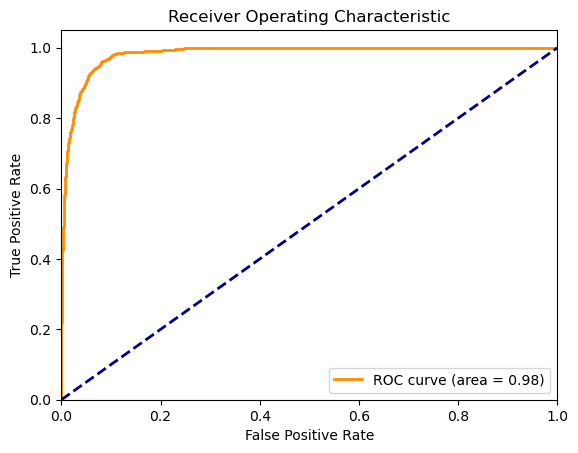

In [116]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<div style="
    background: #121833;
    border: 2px solid #ff6b6b;
    padding: 14px;
    border-radius: 12px;
    font-size: 24px;
    font-weight: bold;
    color: #ff6b6b;
    text-align: center;
    text-shadow: 1px 1px 4px rgba(0,0,0,0.6);
    margin-top: 15px;
">
  📊 Model Evaluation : Rankordering | KS Statistic | Gini Coefficient
</div>


In [118]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.533
15514,0,0.000
30367,0,0.006


In [206]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.533,8
15514,0,0.000,2
30367,0,0.006,6


In [208]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.486
std        0.181
min        0.215
25%        0.319
50%        0.469
75%        0.642
max        0.818
Name: Default Probability, dtype: float64

In [210]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,0.000,1249.000
6,6,0.005,0.030,5.000,1245.000
7,7,0.030,0.215,9.000,1240.000
8,8,0.215,0.818,161.000,1089.000
9,9,0.818,1.000,899.000,351.000


In [212]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.005,0.000,1249.000,0.000,100.000
6,6,0.005,0.030,5.000,1245.000,0.400,99.600
7,7,0.030,0.215,9.000,1240.000,0.721,99.279
8,8,0.215,0.818,161.000,1089.000,12.880,87.120
9,9,0.818,1.000,899.000,351.000,71.920,28.080


In [214]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.818,1.000,899.000,351.000,71.920,28.080
1,8,0.215,0.818,161.000,1089.000,12.880,87.120
2,7,0.030,0.215,9.000,1240.000,0.721,99.279
3,6,0.005,0.030,5.000,1245.000,0.400,99.600
4,5,0.001,0.005,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [216]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.818,1.000,899.000,351.000,71.920,28.080,899.000,351.000
1,8,0.215,0.818,161.000,1089.000,12.880,87.120,1060.000,1440.000
2,7,0.030,0.215,9.000,1240.000,0.721,99.279,1069.000,2680.000
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [218]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.818,1.000,899.000,351.000,71.920,28.080,899.000,351.000,83.706,3.073
1,8,0.215,0.818,161.000,1089.000,12.880,87.120,1060.000,1440.000,98.696,12.606
2,7,0.030,0.215,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [220]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.818,1.000,899.000,351.000,71.920,28.080,899.000,351.000,83.706,3.073,80.633
1,8,0.215,0.818,161.000,1089.000,12.880,87.120,1060.000,1440.000,98.696,12.606,86.090
2,7,0.030,0.215,9.000,1240.000,0.721,99.279,1069.000,2680.000,99.534,23.461,76.073
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


# Checking Rank Ordering

To verify rank ordering, we examine if higher deciles (those assigned larger predicted probabilities) consistently show higher event rates compared to lower deciles. Proper rank ordering means that as we move from the top decile toward the bottom, the proportion of events should decrease step by step.

- **Events** → customers who default (bad)  
- **Non-events** → customers who do not default (good)  

👉 Depending on the use case, these labels can be reversed.  
For example, in a marketing scenario, “events” could represent customers likely to respond positively (good), while “non-events” would be those who ignore the offer (bad).

---

## Observations from the Decile Table

### Top Deciles
- The highest decile (**Decile 9**) shows an **event rate of 71.920%**, meaning most customers in this group are predicted as events, while only 28.080% are non-events. This reflects strong predictive power.  
- The next decile (**Decile 8**) maintains a notable event rate of **12.880%**, and the **cumulative event capture** by this point reaches **98.696%**, which indicates the model successfully identifies the majority of events in just the top two deciles.

### Middle Deciles
- From **Decile 7 to Decile 6**, there is a clear decline in event rates, showing a weaker concentration of events compared to the top deciles.

### Lower Deciles
- **Deciles 5 through 0** contain **no events at all**. These segments are entirely non-events (100%), which suggests the model correctly assigns very low probabilities to customers unlikely to default.

---

## Kolmogorov–Smirnov (KS) Statistic
- The maximum **KS value** occurs at **Decile 8 with 86.090%**.  
- This highlights the point where the separation between cumulative event and non-event distributions is the strongest.  
- Beyond this point, the KS values gradually drop, reflecting a reduction in the model’s ability to separate events from non-events in the lower deciles.

---

## KS Value Interpretation
- The peak **KS value of 86.090% (at Decile 8)** demonstrates the model’s effectiveness in differentiating between events and non-events.  
- Generally, if the maximum KS is found within the **top three deciles** and exceeds **40%**, the model is considered to have **solid predictive strength**.


In [224]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.983673372240103
Gini Coefficient: 0.967346744480206


- **AUC = 0.98**: This indicates that the model has an excellent ability to differentiate between positive (event) and negative (non-event) classes.  

- **Gini Coefficient = 0.96**: This validates the strong predictive power of the model, demonstrating that it ranks the observations almost perfectly in terms of risk.  

- **Interpretation of Gini**:  
  - The Gini value lies between **-1 and 1**.  
  - A value close to **1** reflects a highly accurate model.  
  - A value near **0** shows the model has no discriminatory ability.  
  - A value near **-1** means the model predictions are completely opposite of the true outcomes.  


<h4 style="color:#4CAF50;">✅ Finalizing The Model and Visualizing the Feature Importance</h4>


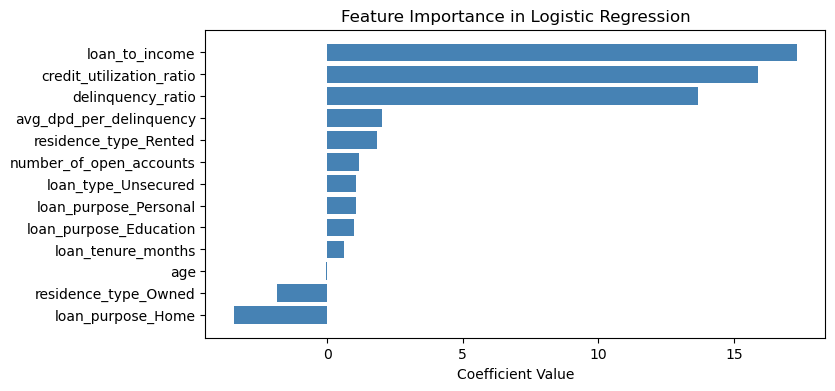

In [231]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Saving the Model

In [234]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False


In [236]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [238]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [240]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [250]:
import os
from joblib import dump

# Define path
save_dir = r"D:\my_projects\Credit_risk_model\artifacts"
os.makedirs(save_dir, exist_ok=True)   # ✅ Creates folder if not exists

# File path
file_path = os.path.join(save_dir, "model_data.joblib")

# Save model
model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}

dump(model_data, file_path)
print(f"✅ Model saved at: {file_path}")


✅ Model saved at: D:\my_projects\Credit_risk_model\artifacts\model_data.joblib


In [252]:
final_model.coef_, final_model.intercept_

(array([[-0.032212  ,  0.61242693,  1.16874097, 15.86409256, 17.32640056,
         13.66166551,  2.03416845, -1.83836239,  1.83588315,  0.9976807 ,
         -3.44435023,  1.0459258 ,  1.0459258 ]]),
 array([-20.66329069]))